2D Map Eval

In [1]:
#model_types = ["articles_large.index", "articles.index", "articles_incl_ARG"]
model_type = "data/ABPR/articles_large.index"

Article ID: 0, Distance: 0.0
Article ID: 197, Distance: 0.7083922624588013
Article ID: 195, Distance: 0.7371349334716797
Article ID: 270, Distance: 0.7473189830780029
Article ID: 237, Distance: 0.7609228491783142


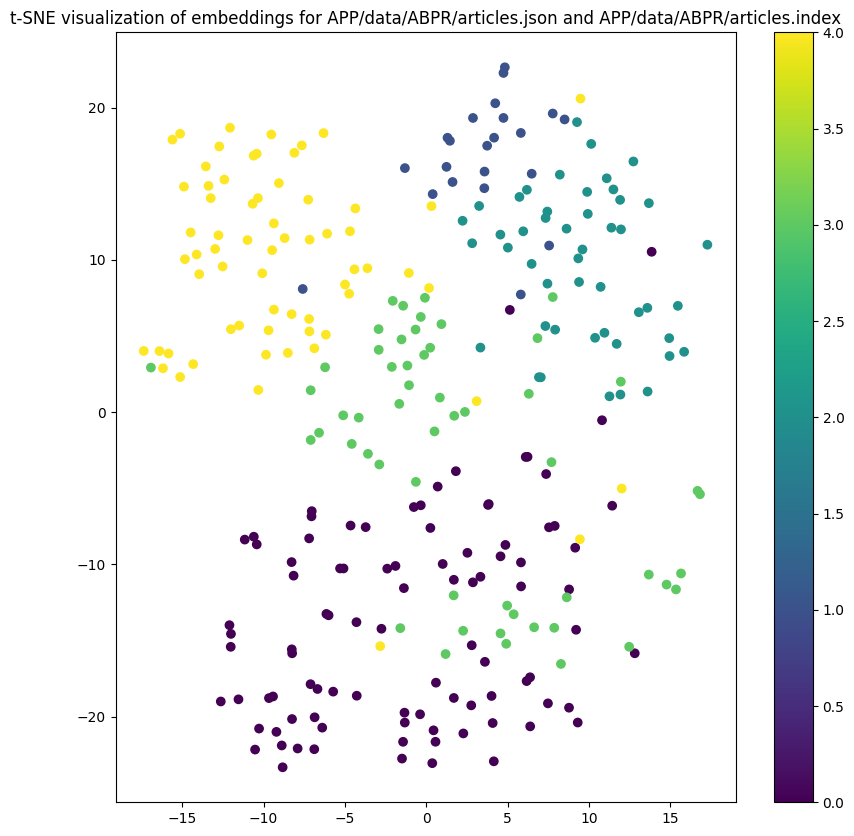

Article ID: 0, Distance: 0.0
Article ID: 195, Distance: 0.6746934652328491
Article ID: 197, Distance: 0.7724854946136475
Article ID: 184, Distance: 0.7762693762779236
Article ID: 1, Distance: 0.7864160537719727


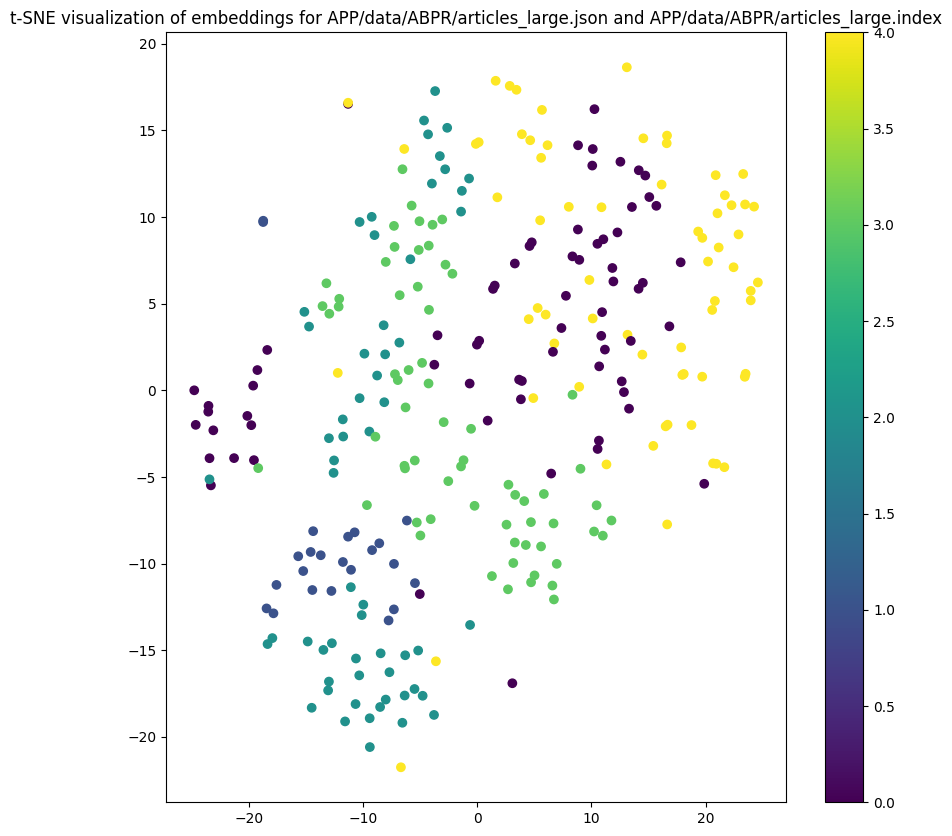

Article ID: 0, Distance: 0.0
Article ID: 1, Distance: 0.5175784230232239
Article ID: 2, Distance: 0.6633974313735962
Article ID: 3, Distance: 0.6870182156562805
Article ID: 4, Distance: 0.6896045207977295


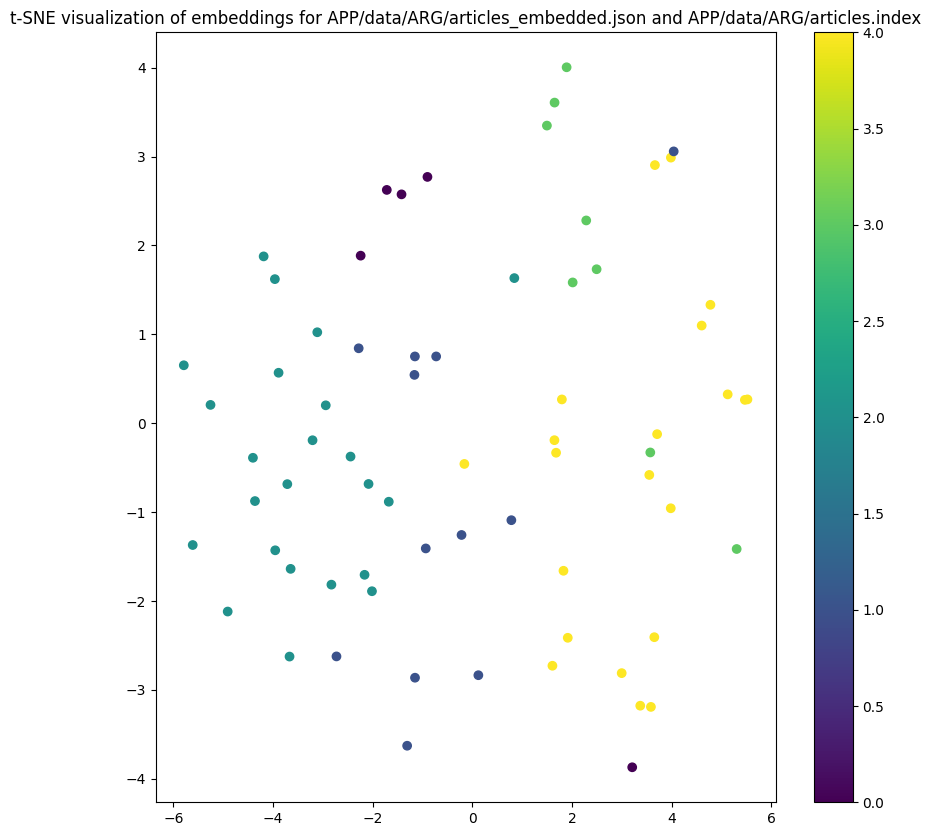

Article ID: 0, Distance: 0.0
Article ID: 184, Distance: 0.7773047685623169
Article ID: 1, Distance: 0.7862243056297302
Article ID: 2, Distance: 0.8157381415367126
Article ID: 21, Distance: 0.912323534488678


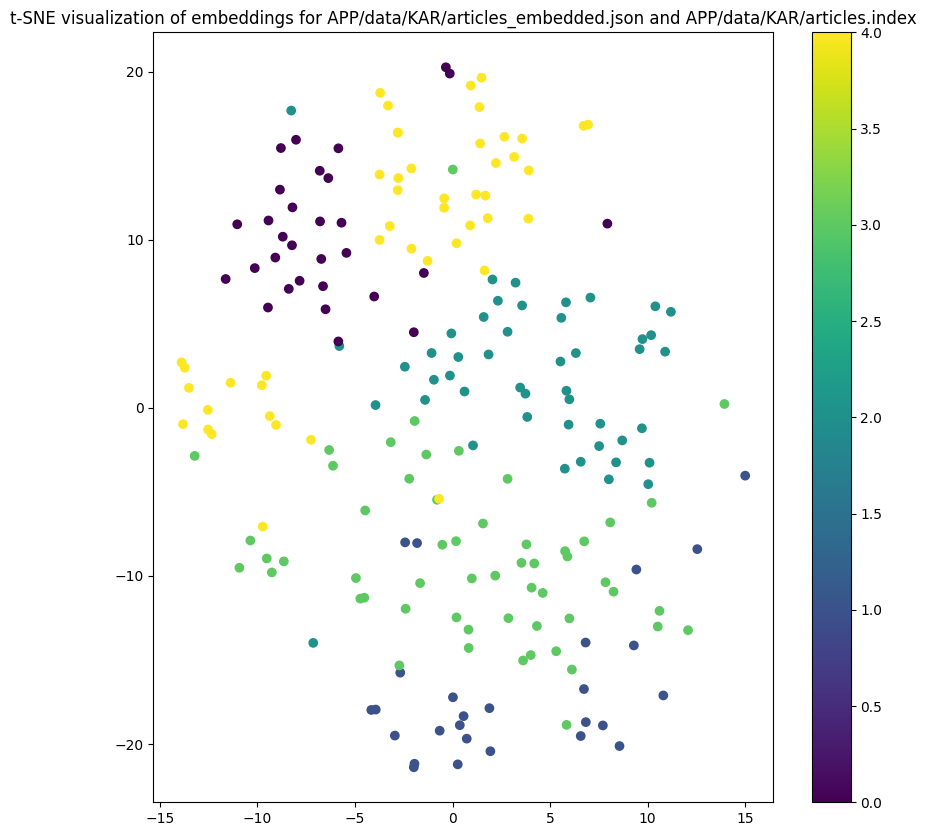

In [10]:
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json
import os

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_model(json_files, index_files, name):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]), k)
            return I[0], D[0]

        # Evaluate with a few sample queries
        sample_query = data[0]['embedding']
        neighbors, distances = similarity_search(sample_query)
        for idx, distance in zip(neighbors, distances):
            print(f"Article ID: {idx}, Distance: {distance}")

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)
        #print(similarity_matrix)
        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        embeddings_2d = tsne.fit_transform(embeddings)

        plt.figure(figsize=(10, 10))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis')
        plt.colorbar()
        plt.title(f"t-SNE visualization of embeddings for {json_file} and {index_file}")
        plt.show()

# Provide the correct paths to your files
evaluate_model(
    ["APP/data/ABPR/articles.json", "APP/data/ABPR/articles_large.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json"],
    ["APP/data/ABPR/articles.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index"],
    ["ABPR_small", "APBR_large", "ARG", "KAR"]
)

3D Map Eval

Article ID: 0, Distance: 0.0
Article ID: 197, Distance: 0.7083922624588013
Article ID: 195, Distance: 0.7371349334716797
Article ID: 270, Distance: 0.7473189830780029
Article ID: 237, Distance: 0.7609228491783142


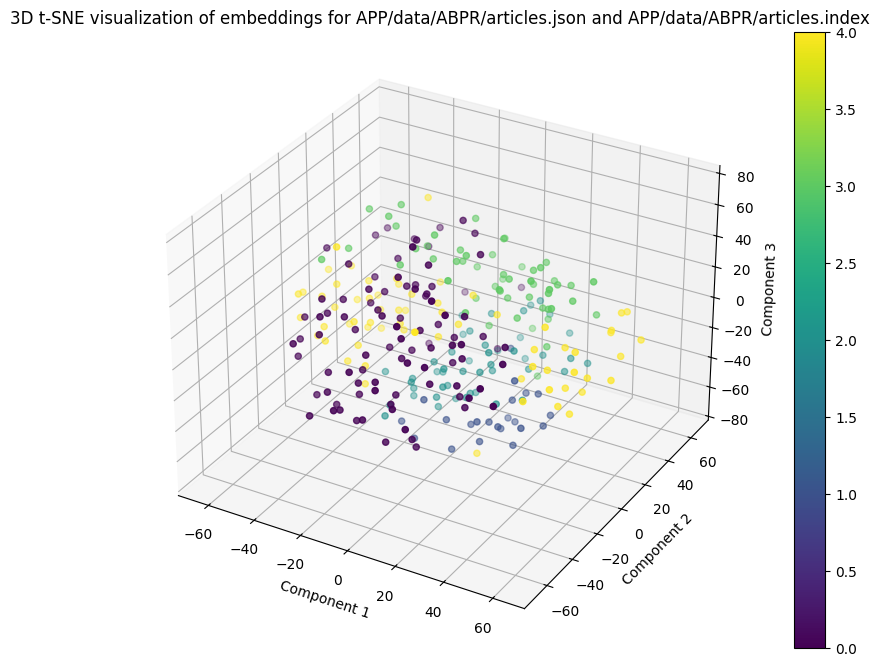

Article ID: 0, Distance: 0.0
Article ID: 195, Distance: 0.6746934652328491
Article ID: 197, Distance: 0.7724854946136475
Article ID: 184, Distance: 0.7762693762779236
Article ID: 1, Distance: 0.7864160537719727


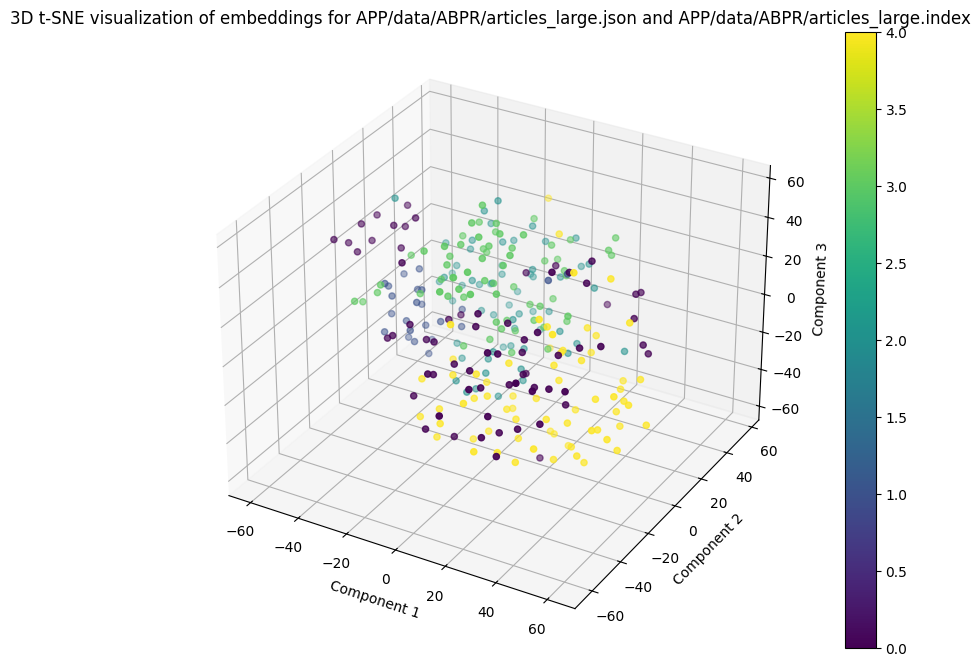

Article ID: 0, Distance: 0.0
Article ID: 1, Distance: 0.5175784230232239
Article ID: 2, Distance: 0.6633974313735962
Article ID: 3, Distance: 0.6870182156562805
Article ID: 4, Distance: 0.6896045207977295


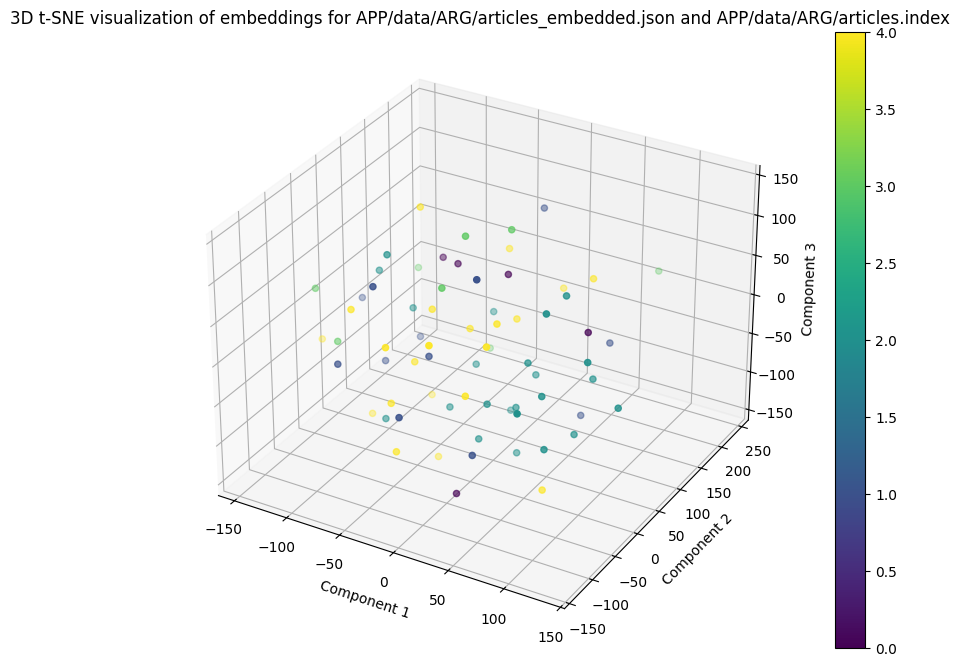

Article ID: 0, Distance: 0.0
Article ID: 184, Distance: 0.7773047685623169
Article ID: 1, Distance: 0.7862243056297302
Article ID: 2, Distance: 0.8157381415367126
Article ID: 21, Distance: 0.912323534488678


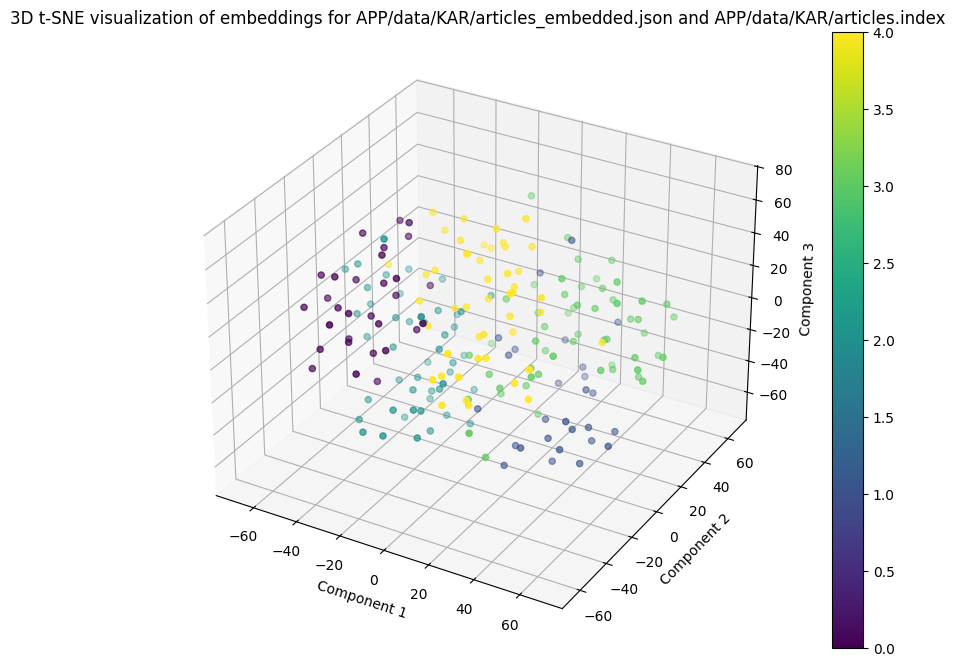

In [17]:
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
import os

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_models(json_files, index_files, name):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]), k)
            return I[0], D[0]

        # Evaluate with a few sample queries
        sample_query = data[0]['embedding']
        neighbors, distances = similarity_search(sample_query)
        for idx, distance in zip(neighbors, distances):
            print(f"Article ID: {idx}, Distance: {distance}")

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)
        #print(similarity_matrix)

        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with 3D t-SNE
        tsne = TSNE(n_components=3, random_state=0)
        embeddings_3d = tsne.fit_transform(embeddings)

        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        sc = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=labels, cmap='viridis')
        plt.colorbar(sc)
        ax.set_title(f"3D t-SNE visualization of embeddings for {json_file} and {index_file}")
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.set_zlabel('Component 3')

        plt.show()

# Provide the correct paths to your files
evaluate_models(
    ["APP/data/ABPR/articles.json", "APP/data/ABPR/articles_large.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json"],
    ["APP/data/ABPR/articles.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index"],
    ["ABPR_small", "APBR_large", "ARG", "KAR"]
)


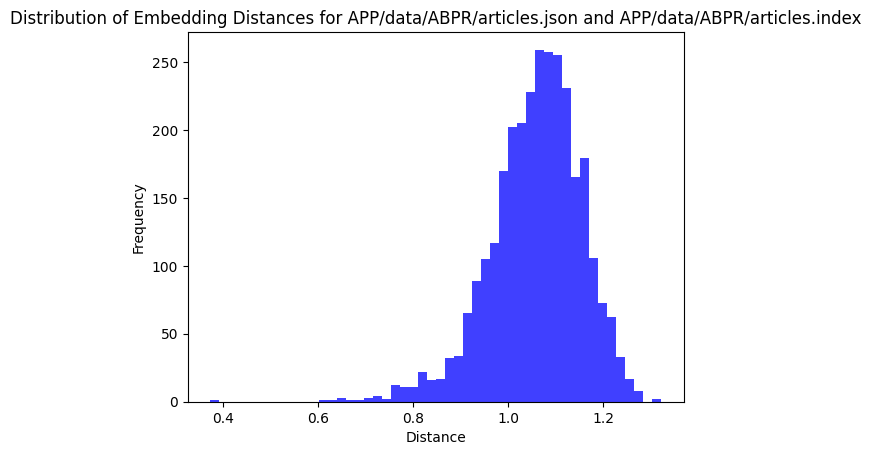

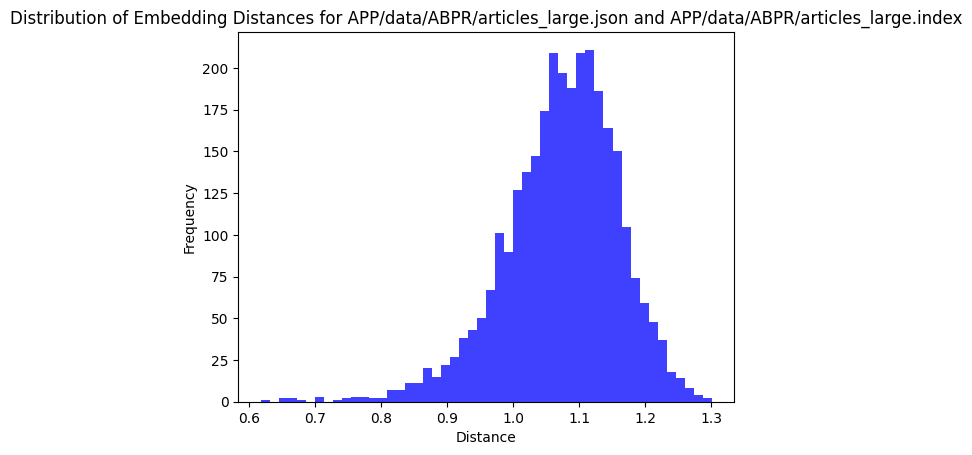

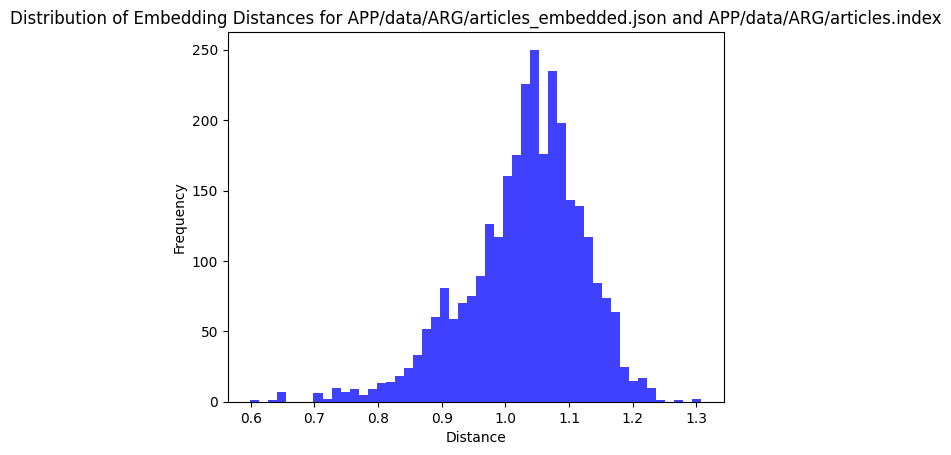

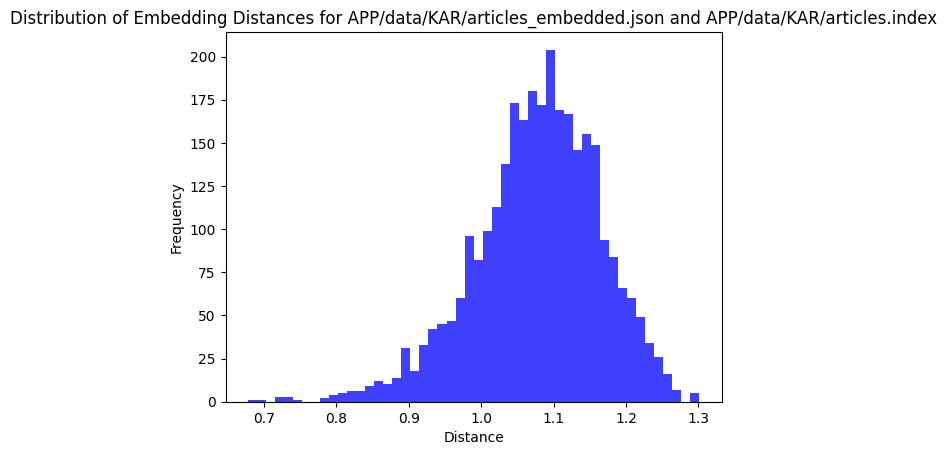

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import faiss
import json
import os

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def evaluate_distance_distribution(json_files, index_files, sample_size=3000):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]

    for json_file, index_file in zip(json_files, index_files):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Calculate distances between a sample of pairs
        distances = []

        for _ in range(sample_size):
            idx1, idx2 = np.random.choice(len(embeddings), 2, replace=False)
            distance = np.linalg.norm(embeddings[idx1] - embeddings[idx2])
            distances.append(distance)

        # Plot the distribution of distances
        plt.hist(distances, bins=50, alpha=0.75, color='blue')
        plt.title(f"Distribution of Embedding Distances for {json_file} and {index_file}")
        plt.xlabel("Distance")
        plt.ylabel("Frequency")
        plt.show()

# Provide the correct paths to your files
evaluate_distance_distribution(
    ["APP/data/ABPR/articles.json", "APP/data/ABPR/articles_large.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json"],
    ["APP/data/ABPR/articles.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index"]
)


In [16]:
import openai
import numpy as np
import faiss
import json

def get_embedding(text, tags=[], model="text-embedding-3-large"):
    text = text.replace("\n", " ")
    combine = text + " " .join(tags)
    return openai.embeddings.create(input=[combine], model=model).data[0].embedding


# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

# Load your articles data
file_path = 'articles.json'
data = load_json(file_path)

# Load your FAISS index
index = faiss.read_index(model_type)

# Define a function to perform similarity search
def similarity_search(query_embedding, k=5):
    D, I = index.search(np.array([query_embedding]), k)
    return I[0], D[0]

# Example query
query_text = "Wann habe ich Mutterschaftsurlaub?"
query_tags = ["tag1", "tag2"]  # Replace with relevant tags

# Generate embedding for the query
query_embedding = get_embedding(query_text, query_tags)

# Perform similarity search
neighbors, distances = similarity_search(query_embedding)

# Display the results
print("Query:", query_text)
for idx, distance in zip(neighbors, distances):
    article = data[idx]
    print(f"\nArticle ID: {idx}")
    print(f"Distance: {distance}")
    print(f"Title: {article['title']}")
    print(f"Text: {article['text']}")



Query: Wann habe ich Mutterschaftsurlaub?

Article ID: 121
Distance: 0.6892930865287781
Title: Anspruch auf Mutterschaftsurlaub
Text: 1. Die Angestellte hat Anspruch auf einen bezahlten Mutterschaftsurlaub von insgesamt 16 Kalenderwochen, den sie frühestens zwei Wochen vor dem ärztlich bestimmten Geburtstermin antreten kann.
2. Ohne ärztliches Zeugnis werden Abwesenheiten von der Arbeit in den letzten zwei Wochen vor der Geburt auf den bezahlten Mutterschaftsurlaub angerechnet.
3. Muss die Angestellte ihre Tätigkeit wegen schwangerschaftsbedingter Beschwerden früher als zwei Wochen vor der Geburt niederlegen, besteht Lohnanspruch, wenn ein ärztliches Zeugnis vorgelegt wird.
4. Nach dem Mutterschaftsurlaub kann der Beschäftigungsgrad auf Gesuch der Angestellten unter Wahrung des Urlaubsanspruches reduziert werden, so weit die dienstlichen Verhältnisse es zulassen.
5. Im Rahmen der betrieblichen Möglichkeiten wird weiterer unbezahlter Urlaub bewilligt.

Article ID: 122
Distance: 0.870588

FAISS index dimensionality: 1536
Article ID: 170 ABPR,  Distance: 0.756586492061615 Pausen
Article ID: 123 ABPR,  Distance: 0.9231743812561035 Beschäftigungserleichterung
Article ID: 161 ABPR,  Distance: 0.9294896125793457 Geschäfts- und Blockzeit
Article ID: 159 ABPR,  Distance: 0.9403868913650513 Grundsätze zur flexiblen und gleitenden Arbeitszeit
Article ID: 140 ABPR,  Distance: 0.9643549919128418 Urlaubs- und Kostenregelung


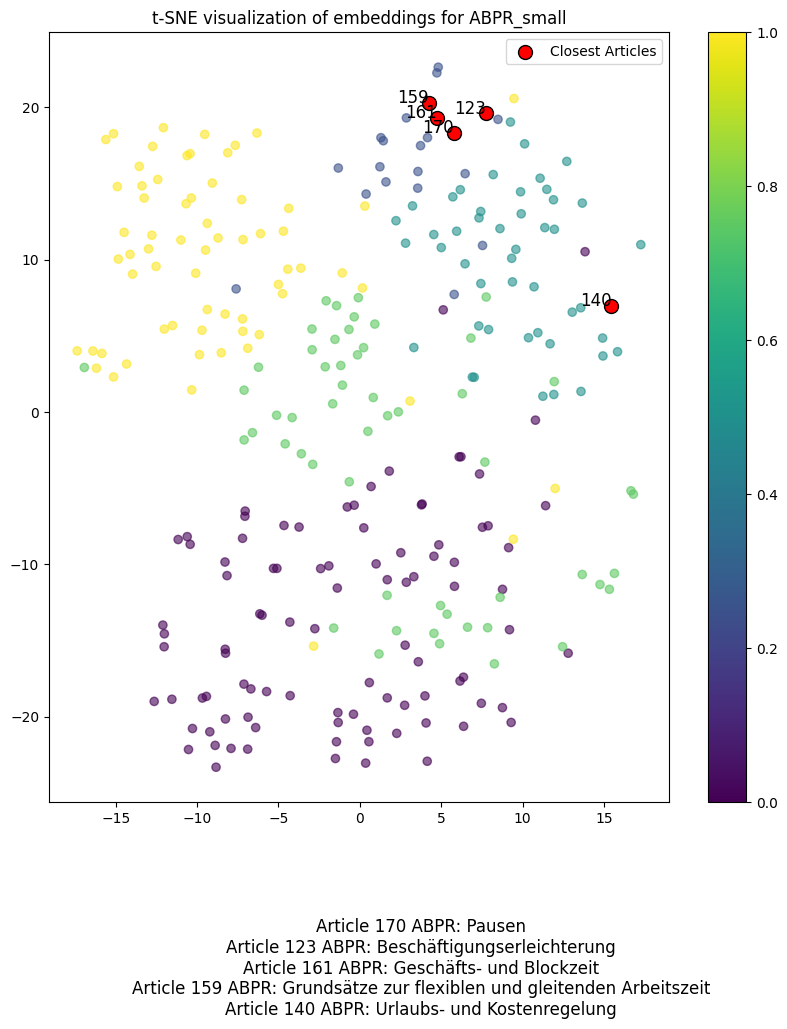

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.803542971611023 Pausen
Article ID: 123 ABPR,  Distance: 0.9544188380241394 Beschäftigungserleichterung
Article ID: 161 ABPR,  Distance: 0.9946762323379517 Geschäfts- und Blockzeit
Article ID: 140 ABPR,  Distance: 1.0274226665496826 Urlaubs- und Kostenregelung
Article ID: 159 ABPR,  Distance: 1.046137809753418 Grundsätze zur flexiblen und gleitenden Arbeitszeit


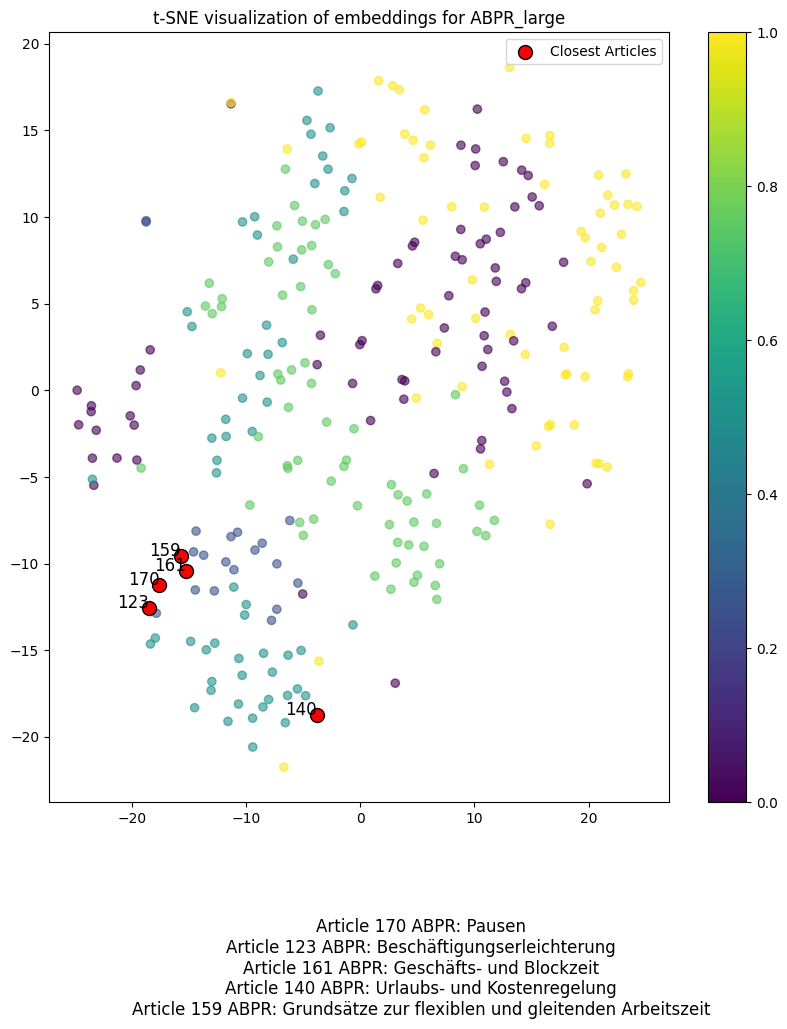

FAISS index dimensionality: 3072
Article ID: 14 ARG,  Distance: 0.7975314259529114 Pausen
Article ID: 41 ARG,  Distance: 1.002259612083435 Arbeitnehmer mit Familienpflichten
Article ID: 18 ARG,  Distance: 1.0065398216247559 Dauer der Nachtarbeit
Article ID: 11 ARG,  Distance: 1.0287545919418335 Ausgleich ausfallender Arbeitszeit
Article ID: 15 ARG,  Distance: 1.0376845598220825 Tägliche Ruhezeit


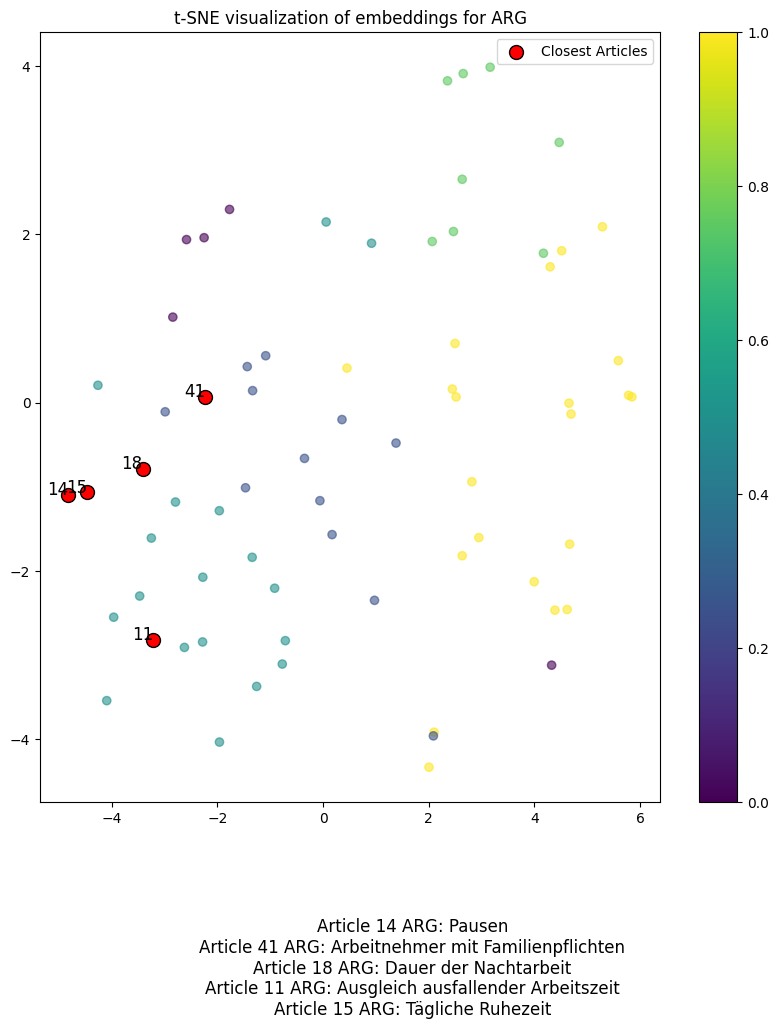

FAISS index dimensionality: 3072
Article ID: 170 ABPR,  Distance: 0.8046746850013733 Pausen
Article ID: 123 ABPR,  Distance: 0.9551337957382202 Beschäftigungserleichterung
Article ID: 161 ABPR,  Distance: 0.9968041777610779 Geschäfts- und Blockzeit
Article ID: 201 KAR,  Distance: 1.0159178972244263 Ruhetage
Article ID: 199 KAR,  Distance: 1.0223164558410645 Ruhetage


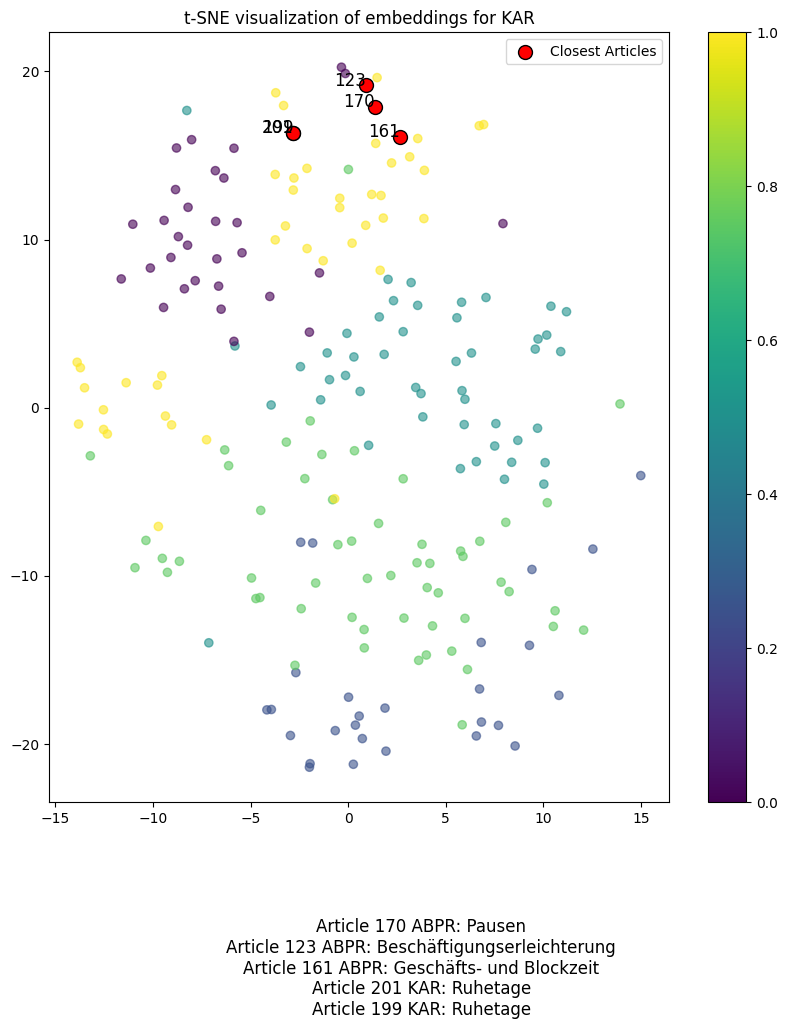

FAISS index dimensionality: 3072
Article ID: 283 PReg,  Distance: 0.7398272752761841 Pausenregelung
Article ID: 218 AZRG,  Distance: 0.783101499080658 Kurzpause
Article ID: 170 ABPR,  Distance: 0.7859522104263306 Pausen
Article ID: 285 PReg,  Distance: 0.8239342570304871 Verfügbarkeit während der Pause
Article ID: 217 AZRG,  Distance: 0.8306213021278381 Verpflegungspause


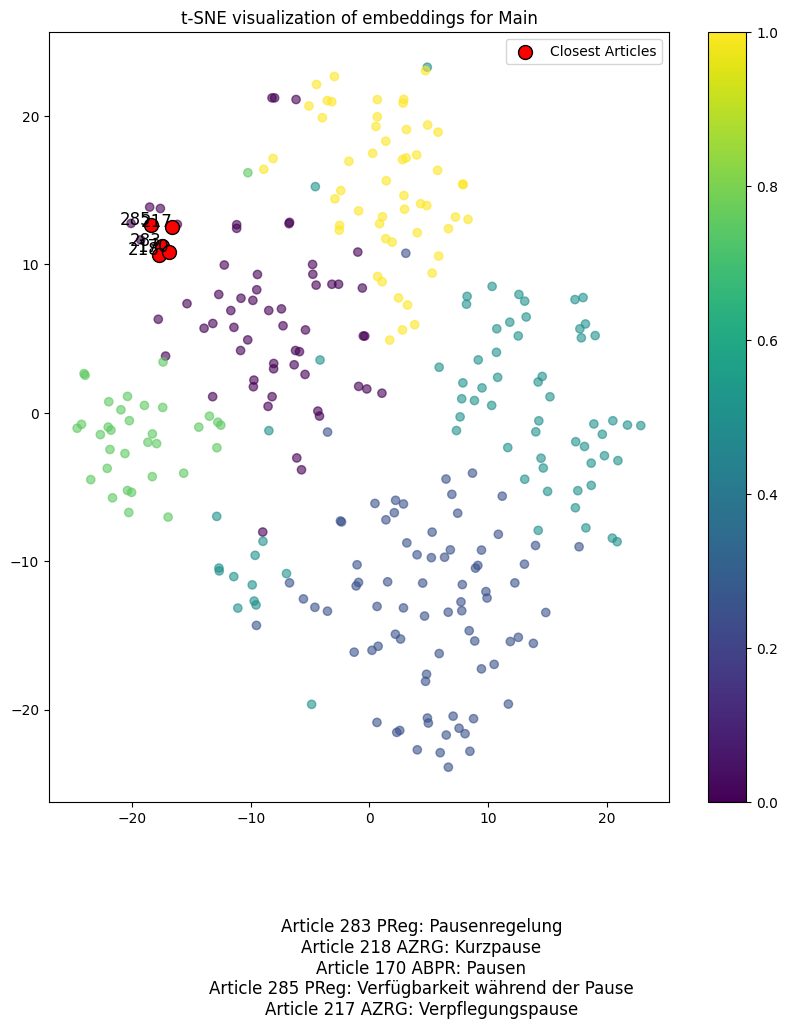

In [47]:
import json
import numpy as np
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import openai
import os
from dotenv import load_dotenv

# Configure OpenAI API key
load_dotenv()
openai.api_key = os.getenv('OPENAI_API_KEY')

# Load Models
model_large = "text-embedding-3-large"  
model_small = "text-embedding-3-small" 

def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)

def get_embedding_large(text, model=model_large):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def get_embedding_small(text, model=model_small):
    text = text.replace("\n", " ")
    return openai.embeddings.create(input=[text], model=model).data[0].embedding

def evaluate_model(json_files, index_files, names, models, query):
    if isinstance(json_files, str):
        json_files = [json_files]
    if isinstance(index_files, str):
        index_files = [index_files]
    if isinstance(names, str):
        names = [names]
    if isinstance(models, str):
        models = [models]

    for json_file, index_file, dataset_name, model in zip(json_files, index_files, names, models):
        # Check if the JSON file exists
        if not os.path.exists(json_file):
            raise FileNotFoundError(f"JSON file '{json_file}' not found.")
        
        # Check if the FAISS index file exists
        if not os.path.exists(index_file):
            raise FileNotFoundError(f"FAISS index file '{index_file}' not found.")

        # Load JSON data
        data = load_json(json_file)
        
        # Load FAISS index
        index = faiss.read_index(index_file)
        embeddings = np.array([article['embedding'] for article in data])

        # Check the dimensionality of the FAISS index
        print(f"FAISS index dimensionality: {index.d}")

        # Convert query to embedding
        if model == "large":
            query_embedding = get_embedding_large(query)
        elif model == "small":
            query_embedding = get_embedding_small(query)
        else:
            raise ValueError("Invalid model type specified")
        
          # Extract titles of closest articles
      

        # Define a function to perform similarity search
        def similarity_search(query_embedding, k=5):
            D, I = index.search(np.array([query_embedding]).astype('float32'), k)
            return I[0], D[0]

        # Perform similarity search with the query embedding
        neighbors, distances = similarity_search(query_embedding)
        closest_titles = [data[idx]['title'] for idx in neighbors]
        closest_Gesetzestext = [data[idx]['metadata']['Gesetzestext'] for idx in neighbors]
        for idx, distance, gesetzestext, title in zip(neighbors, distances, closest_Gesetzestext, closest_titles):
            print(f"Article ID: {idx} {gesetzestext},  Distance: {distance} {title}")

        

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)

        # Clustering
        kmeans = KMeans(n_clusters=5, random_state=0).fit(embeddings)
        labels = kmeans.labels_

        # Visualize with t-SNE
        tsne = TSNE(n_components=2, random_state=0)
        embeddings_2d = tsne.fit_transform(embeddings)

        plt.figure(figsize=(10, 10))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)

        # Highlight closest articles
        closest_points = embeddings_2d[neighbors]
        plt.scatter(closest_points[:, 0], closest_points[:, 1], c='red', edgecolors='k', s=100, label='Closest Articles')
        
        # Add article numbers
        for i, (x, y) in enumerate(closest_points):
            plt.text(x, y, str(neighbors[i]), fontsize=12, ha='right')

        plt.colorbar()
        plt.title(f"t-SNE visualization of embeddings for {dataset_name}")
        plt.legend()
        
        # Display list of closest articles at the bottom
        plt.figtext(0.5, -0.1, "\n".join([f"Article {idx} {gesetzestext}: {title} " for idx, title, gesetzestext in zip(neighbors, closest_titles, closest_Gesetzestext)]), 
                    wrap=True, horizontalalignment='center', fontsize=12)

        plt.show()

query = "Was sind die Pausenregelungen?"

evaluate_model(
    ["APP/data/ABPR/articles.json", "APP/data/ABPR/articles_large.json", "APP/data/ARG/articles_embedded.json", "APP/data/KAR/articles_embedded.json", "APP/data/JSON/articles_main_embedded.json"],
    ["APP/data/ABPR/articles.index", "APP/data/ABPR/articles_large.index", "APP/data/ARG/articles.index", "APP/data/KAR/articles.index", "APP/data/JSON/articles_main.index"],
    ["ABPR_small", "ABPR_large", "ARG", "KAR", "Main"],
    ["small", "large", "large", "large", "large"],
    query
)
